In [350]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

from pylab import rcParams
from pandas.plotting import register_matplotlib_converters

import tensorflow as tf

In [351]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [352]:
# traindf = pd.read_csv('ECG5000/ECG5000_TRAIN.txt', header=None)

In [353]:
# testdf = pd.read_csv('ECG5000/ECG5000_TEST.txt', header=None)

In [354]:
from scipy.io.arff import loadarff

In [355]:
with open('ECG5000/ECG5000_TRAIN.arff') as f:
    train = loadarff(f)

In [356]:
df_train = pd.DataFrame(train[0])

In [357]:
df_train.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,b'1'
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,b'1'
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,b'1'
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,b'1'
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,b'1'


In [358]:
with open('ECG5000/ECG5000_TEST.arff') as f:
    test = loadarff(f)

In [359]:
df_test = pd.DataFrame(test[0])

In [360]:
df_test.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,b'1'
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,b'1'
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,b'1'
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,b'1'
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,b'1'


In [361]:
df_train.shape, df_test.shape

((500, 141), (4500, 141))

In [362]:
df = df_train.append(df_test)
df = df.sample(frac=1.0)
df.shape

(5000, 141)

In [363]:
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
1001,1.469756,-1.048520,-3.394356,-4.254399,-4.162834,-3.822570,-3.003609,-1.799773,-1.500033,-1.025095,...,0.945178,1.275588,1.617218,1.580279,1.306195,1.351674,1.915517,1.672103,-1.039932,b'1'
2086,-1.998602,-3.770552,-4.267091,-4.256133,-3.515288,-2.554540,-1.699639,-1.566366,-1.038815,-0.425483,...,1.008577,1.024698,1.051141,1.015352,0.988475,1.050191,1.089509,1.465382,0.799517,b'1'
2153,-1.187772,-3.365038,-3.695653,-4.094781,-3.992549,-3.425381,-2.057643,-1.277729,-1.307397,-0.623098,...,1.085007,1.467196,1.413850,1.283822,0.923126,0.759235,0.932364,1.216265,-0.824489,b'1'
555,0.604969,-1.671363,-3.236131,-3.966465,-4.067820,-3.551897,-2.582864,-1.804755,-1.688151,-1.025897,...,0.545222,0.649363,0.986846,1.234495,1.280039,1.215985,1.617971,2.196543,0.023843,b'1'
205,-1.197203,-3.270123,-3.778723,-3.977574,-3.405060,-2.392634,-1.726322,-1.572748,-0.920075,-0.388731,...,0.828168,0.914338,1.063077,1.393479,1.469756,1.392281,1.144732,1.668263,1.734676,b'1'


In [364]:
CLASS_NORMAL = 1

class_names = ['Normal','R on T','PVC','SP','UB']

In [365]:
df.columns[-1]

'target'

In [366]:
df.target.value_counts()

b'1'    2919
b'2'    1767
b'4'     194
b'3'      96
b'5'      24
Name: target, dtype: int64

In [367]:
draw_df = df.reset_index().melt(id_vars=['index', 'target'], var_name='col')

In [368]:
draw_df.head()

,index,target,col,value
0,1001,b'1',att1,1.469756
1,2086,b'1',att1,-1.998602
2,2153,b'1',att1,-1.187772
3,555,b'1',att1,0.604969
4,205,b'1',att1,-1.197203


In [369]:
draw_df['target'] = draw_df.target.astype(str)

In [370]:
# # pass custom palette:
# sns.lineplot(x='index', 
#             y='value',
#             hue='target',
#             data=draw_df)

In [371]:
normal_df = df[df.target == b'1']
normal_df.shape

(2919, 141)

In [372]:
anomaly_df = df[df.target != str(CLASS_NORMAL)]
anomaly_df.shape

(5000, 141)

In [373]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
  normal_df,
  test_size=0.15,
  random_state=RANDOM_SEED
)

val_df, test_df = train_test_split(
  val_df,
  test_size=0.33,
  random_state=RANDOM_SEED
)

In [374]:
def create_dataset(df):

  sequences = df.astype(np.float32).to_numpy().tolist()

  dataset = [np.expand_dims(s, axis=1) for s in sequences]

  n_seq, seq_len, n_features = np.stack(dataset).shape

  return dataset, seq_len, n_features

In [375]:
train_df.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att132', 'att133', 'att134', 'att135', 'att136', 'att137', 'att138',
       'att139', 'att140', 'target'],
      dtype='object', length=141)

In [376]:
train_df, val_df = train_test_split(
  normal_df,
  test_size=0.15,
  random_state=RANDOM_SEED
)

val_df, test_df = train_test_split(
  val_df,
  test_size=0.33,
  random_state=RANDOM_SEED
)

In [377]:
train_df.shape, test_df.shape

((2481, 141), (145, 141))

In [378]:
# train_dataset, seq_len, n_features = create_dataset(train_df)
# val_dataset, _, _ = create_dataset(val_df)
# test_normal_dataset, _, _ = create_dataset(test_df)
# test_anomaly_dataset, _, _ = create_dataset(anomaly_df)

In [379]:
train_df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
1603,0.245897,-2.381731,-3.379114,-4.150560,-4.362152,-3.604735,-2.203830,-1.692911,-1.411593,-0.453160,...,0.801240,0.956382,1.052721,1.283904,1.140007,1.142146,0.833684,1.462835,1.532836,b'1'
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,b'1'
2553,0.070699,-2.856309,-4.265050,-4.404080,-4.180707,-3.840098,-2.526704,-1.319836,-1.181694,-0.682616,...,1.168188,1.352643,1.585120,1.585385,1.309638,1.017802,0.896873,1.368133,-0.049731,b'1'
269,-1.537689,-2.534511,-4.240574,-5.250626,-4.853930,-4.223230,-3.200279,-2.332330,-1.817484,-1.083945,...,-0.032903,0.299982,0.707729,0.908099,1.004647,0.855263,0.383952,0.890997,0.461981,b'1'
286,-0.296967,-2.149871,-3.835708,-4.670072,-4.334111,-3.239545,-2.080338,-1.665445,-1.266009,-0.374374,...,0.800871,1.086116,1.090475,0.898527,0.860276,1.536581,1.852604,0.618098,-2.105530,b'1'


In [380]:
train_df.shape, test_df.shape

((2481, 141), (145, 141))

In [381]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - 1):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        vy = y.iloc[i:(i + time_steps), -1].values
        ys.append(vy)
    return np.array(Xs), np.array(ys)

In [383]:
TIME_STEPS = 30

Z_test, z_test = create_dataset(
  df,
  df,
  TIME_STEPS
)

print(Z_test.shape)

(4969, 30, 141)


In [271]:
TIME_STEPS = 30

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(
  train_df,
  train_df,
  TIME_STEPS
)

X_test, y_test = create_dataset(
  test_df,
  test_df,
  TIME_STEPS
)

print(X_train.shape)

(2450, 30, 141)


In [272]:
y_train.shape

(2450, 30)

In [273]:
X_train.shape, X_test.shape

((2450, 30, 141), (114, 30, 141))

In [274]:
y_train = np.array(y_train)

In [275]:
# y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])

In [276]:
# y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])

In [277]:
X_train.shape, y_train.shape

((2450, 30, 141), (2450, 30))

In [280]:
# model
import keras
from keras.layers import LSTM, Dropout, RepeatVector, TimeDistributed, Dense

model = keras.Sequential()
model.add(LSTM(60, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(RepeatVector(n=X_train.shape[1]))
model.add(LSTM(60, return_sequences=True))
model.add(LSTM(60))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[1]))

model.compile(loss='mae', optimizer='adam')

In [281]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=TIME_STEPS,
    shuffle=False
)

Epoch 1/10
2450/2450 [==============================] - 20s 8ms/step - loss: 0.2808
Epoch 2/10
2450/2450 [==============================] - 7s 3ms/step - loss: 0.1285
Epoch 3/10
2450/2450 [==============================] - 6s 3ms/step - loss: 0.1001
Epoch 4/10
2450/2450 [==============================] - 7s 3ms/step - loss: 0.0848
Epoch 5/10
2450/2450 [==============================] - 7s 3ms/step - loss: 0.0751
Epoch 6/10
2450/2450 [==============================] - 6s 3ms/step - loss: 0.0692
Epoch 7/10
2450/2450 [==============================] - 7s 3ms/step - loss: 0.0632
Epoch 8/10
2450/2450 [==============================] - 7s 3ms/step - loss: 0.0590
Epoch 9/10
2450/2450 [==============================] - 6s 3ms/step - loss: 0.0563
Epoch 10/10
2450/2450 [==============================] - 6s 3ms/step - loss: 0.0544


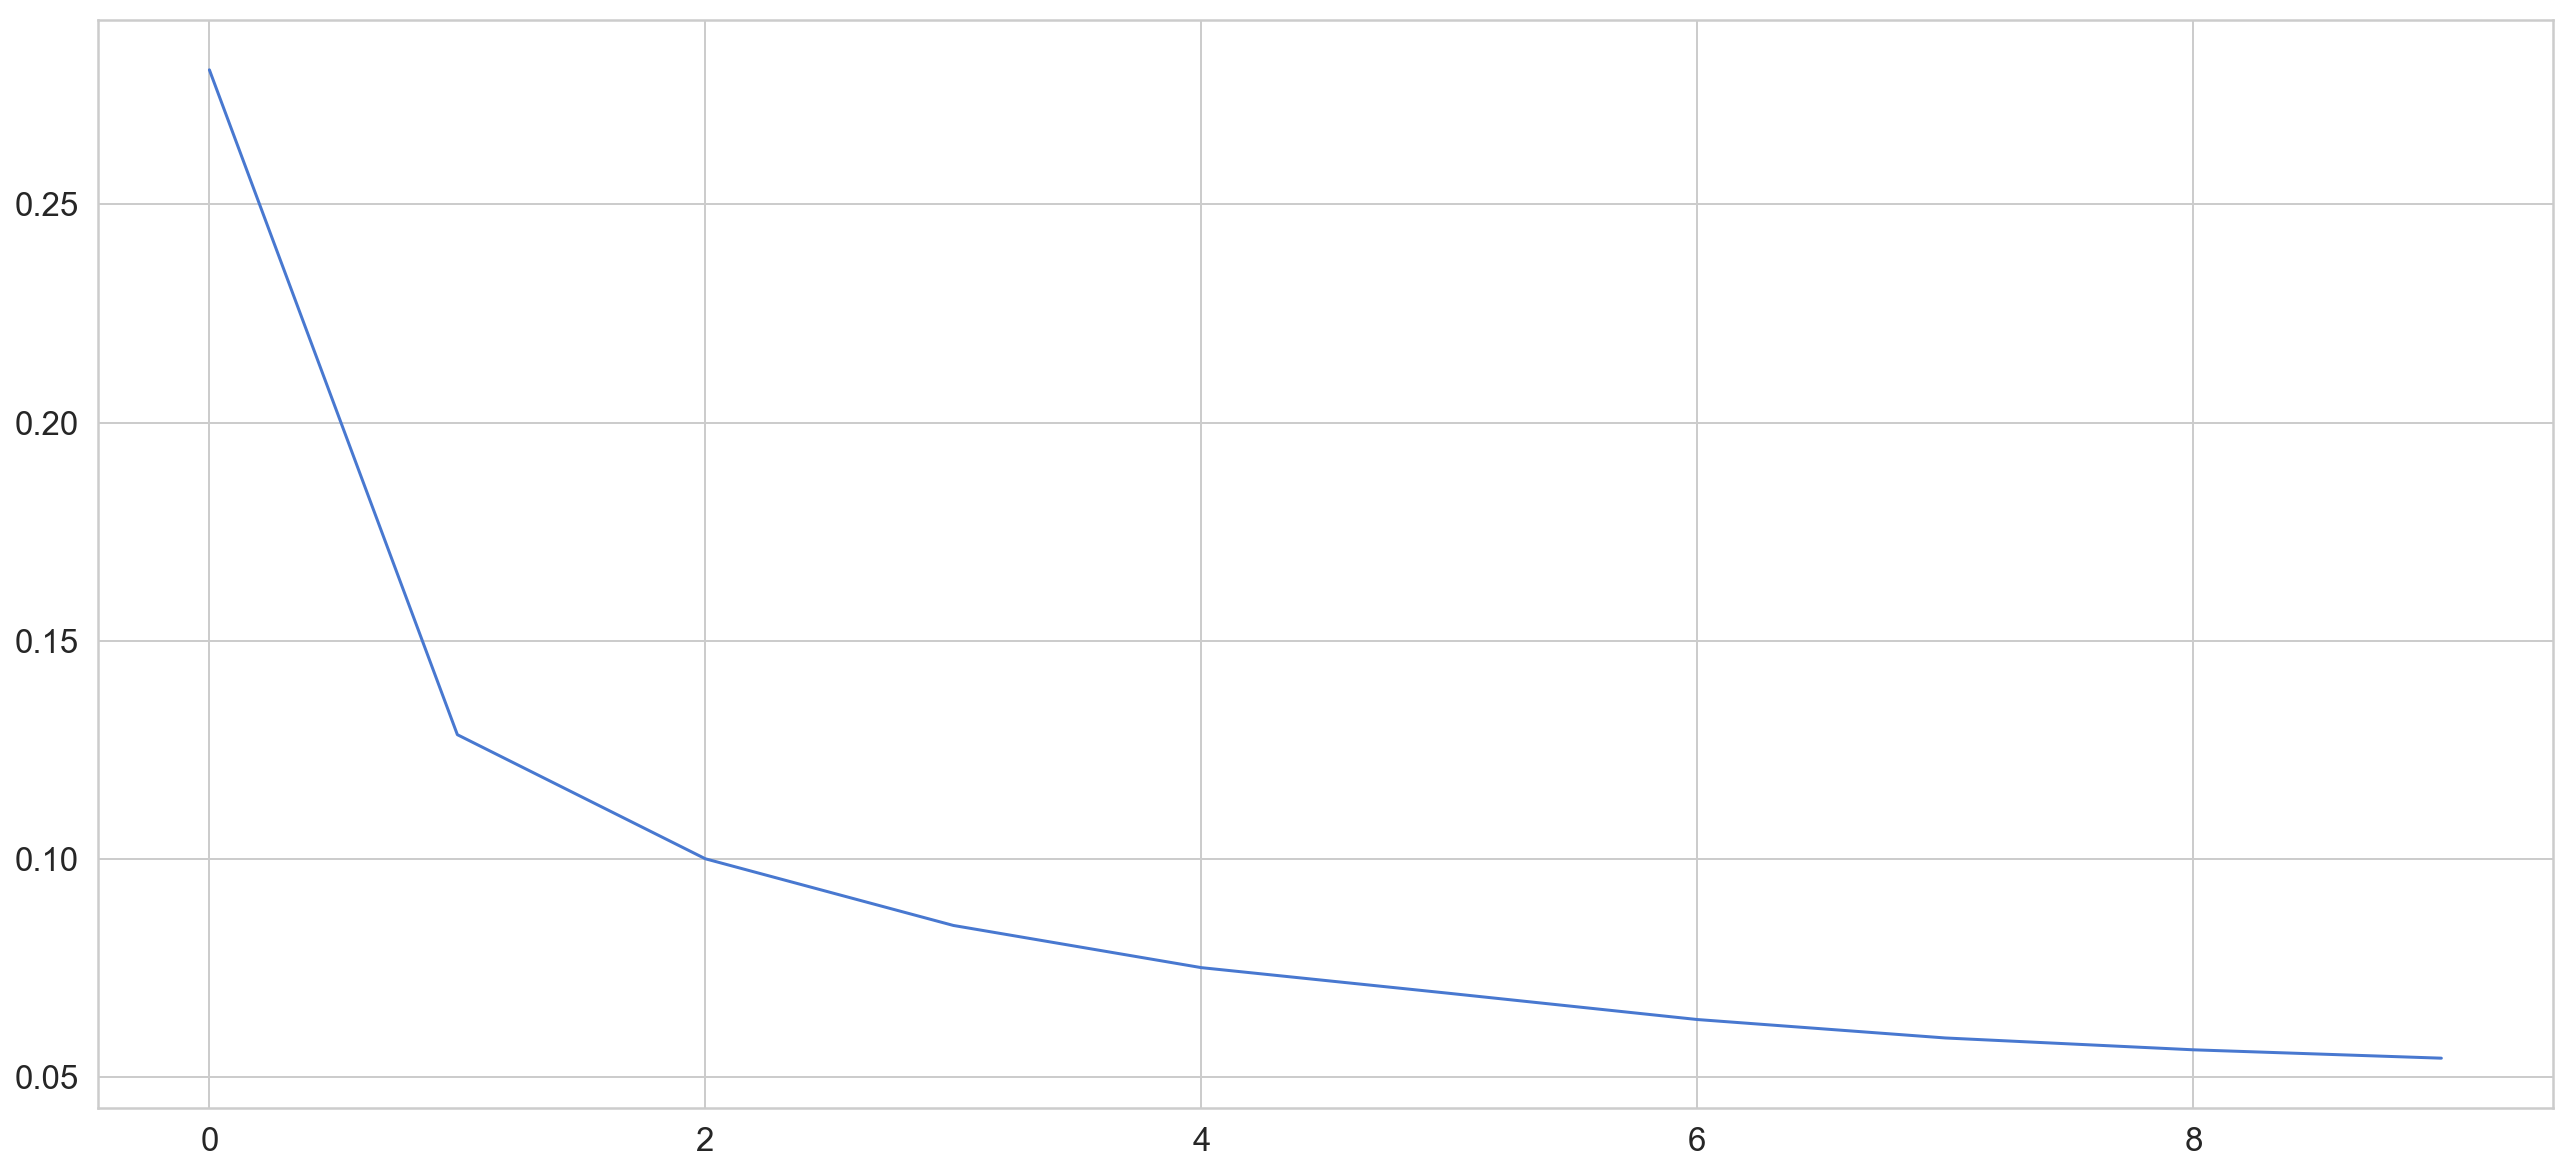

In [282]:
plt.plot(history.history['loss'])

In [290]:
X_train_pred = model.predict(X_train, batch_size=TIME_STEPS)

In [294]:
y_train = np.full(X_train_pred.shape, 1)

In [296]:
train_mae_loss = np.mean(np.abs(X_train_pred - y_train), axis=1)

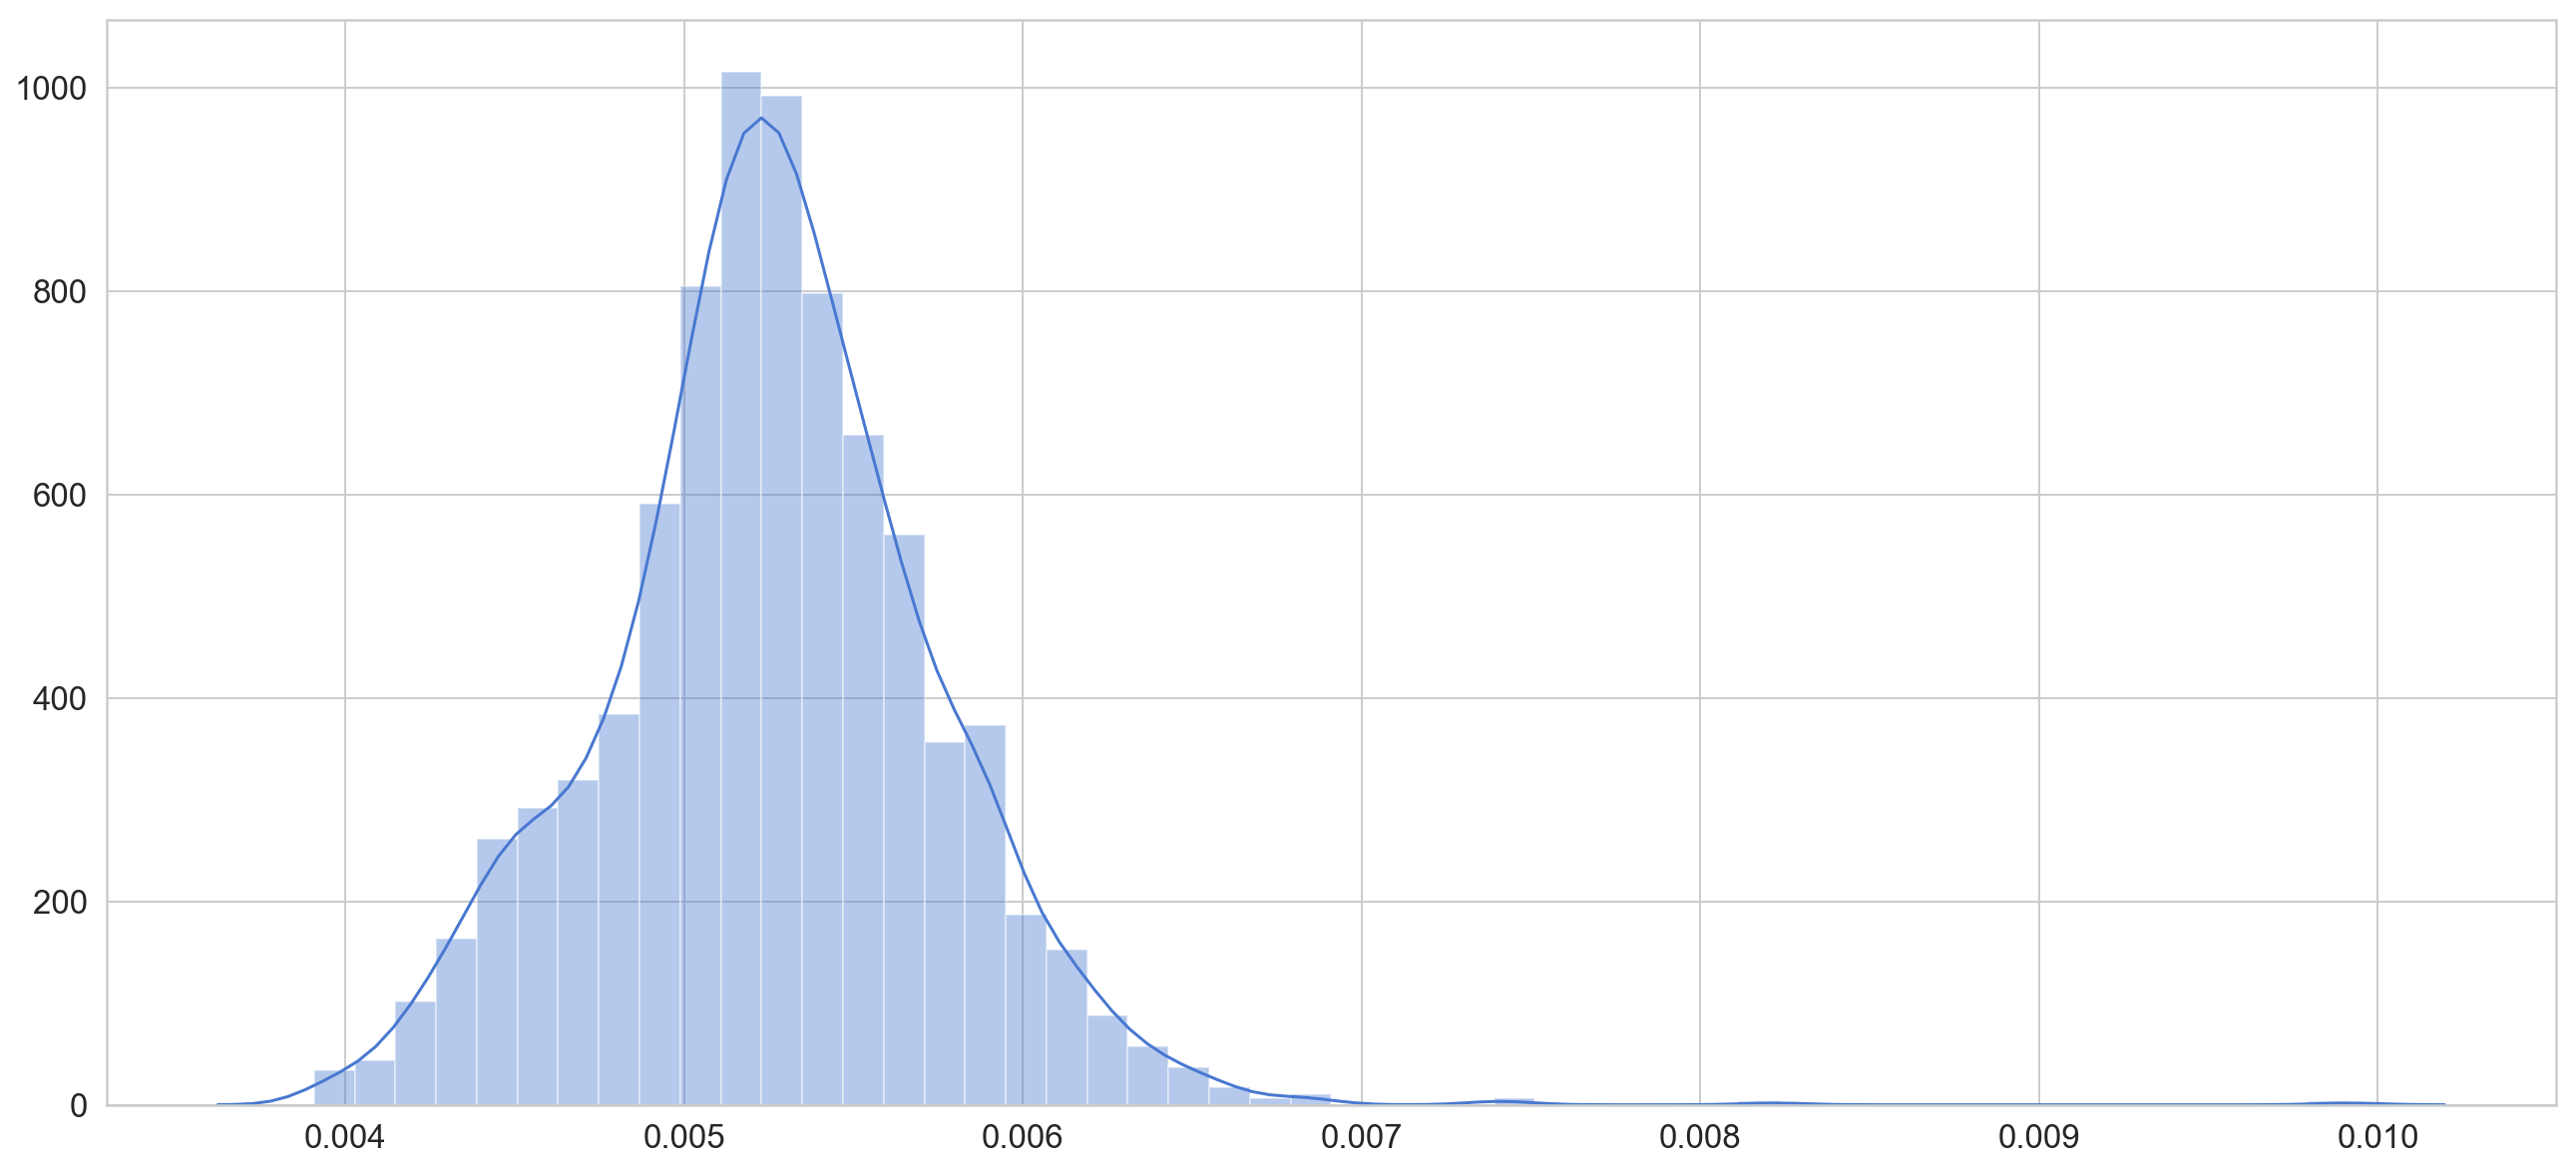

In [297]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [452]:
THRESHOLD=0.5

In [457]:
Z_test_pred = model.predict(Z_test, batch_size=TIME_STEPS)

In [458]:
z_test = z_test.astype(str)

In [459]:
z_test = z_test.astype(float)

In [460]:
test_mae_loss = np.mean(np.abs(Z_test_pred - z_test), axis=1)

In [462]:
len(z_test), len(df)

(4969, 5000)

In [466]:
test_score_df = pd.DataFrame(index=range(0, len(Z_test[:])))
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold

In [467]:
len(test_score_df), z_test.shape

(4969, (4969, 30))

In [504]:
#df.iloc[TIME_STEPS+1:, -1] = [eval(val).decode("utf-8") for val in df.iloc[TIME_STEPS+1:, -1]]

In [505]:
#df.iloc[TIME_STEPS+1:, -1] = df.iloc[TIME_STEPS+1:, -1].astype(float)

In [506]:
len(df[TIME_STEPS:])

4970

In [507]:
test_score_df['target'] = df.iloc[TIME_STEPS+1:, -1].values

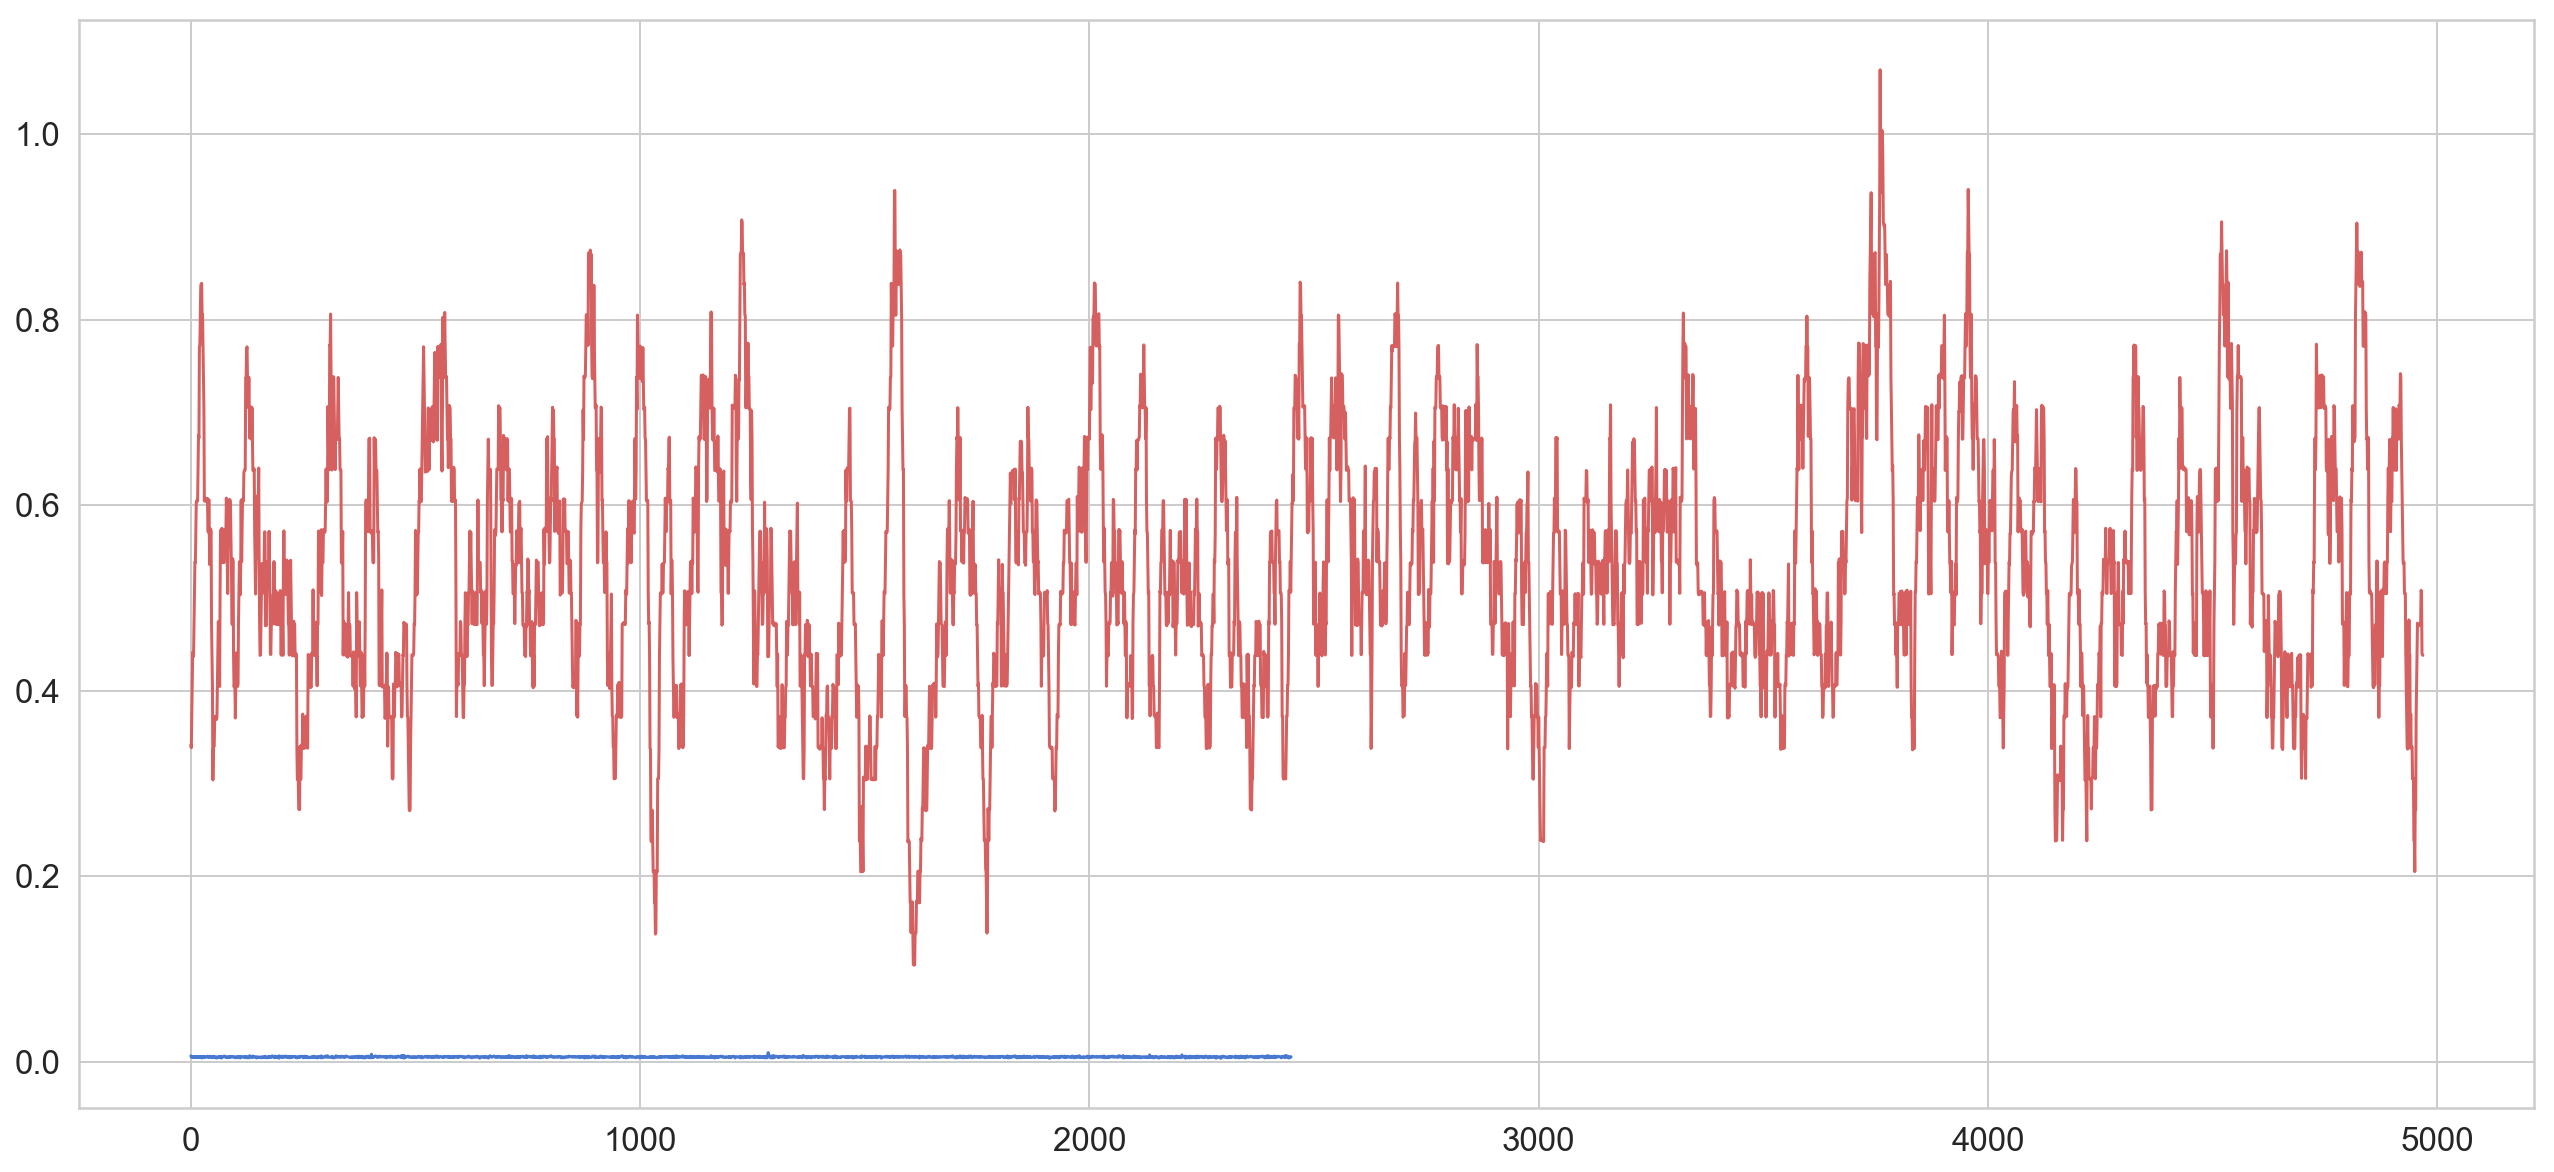

In [508]:
plt.plot(train_mae_loss)
plt.plot(test_mae_loss, color='r')

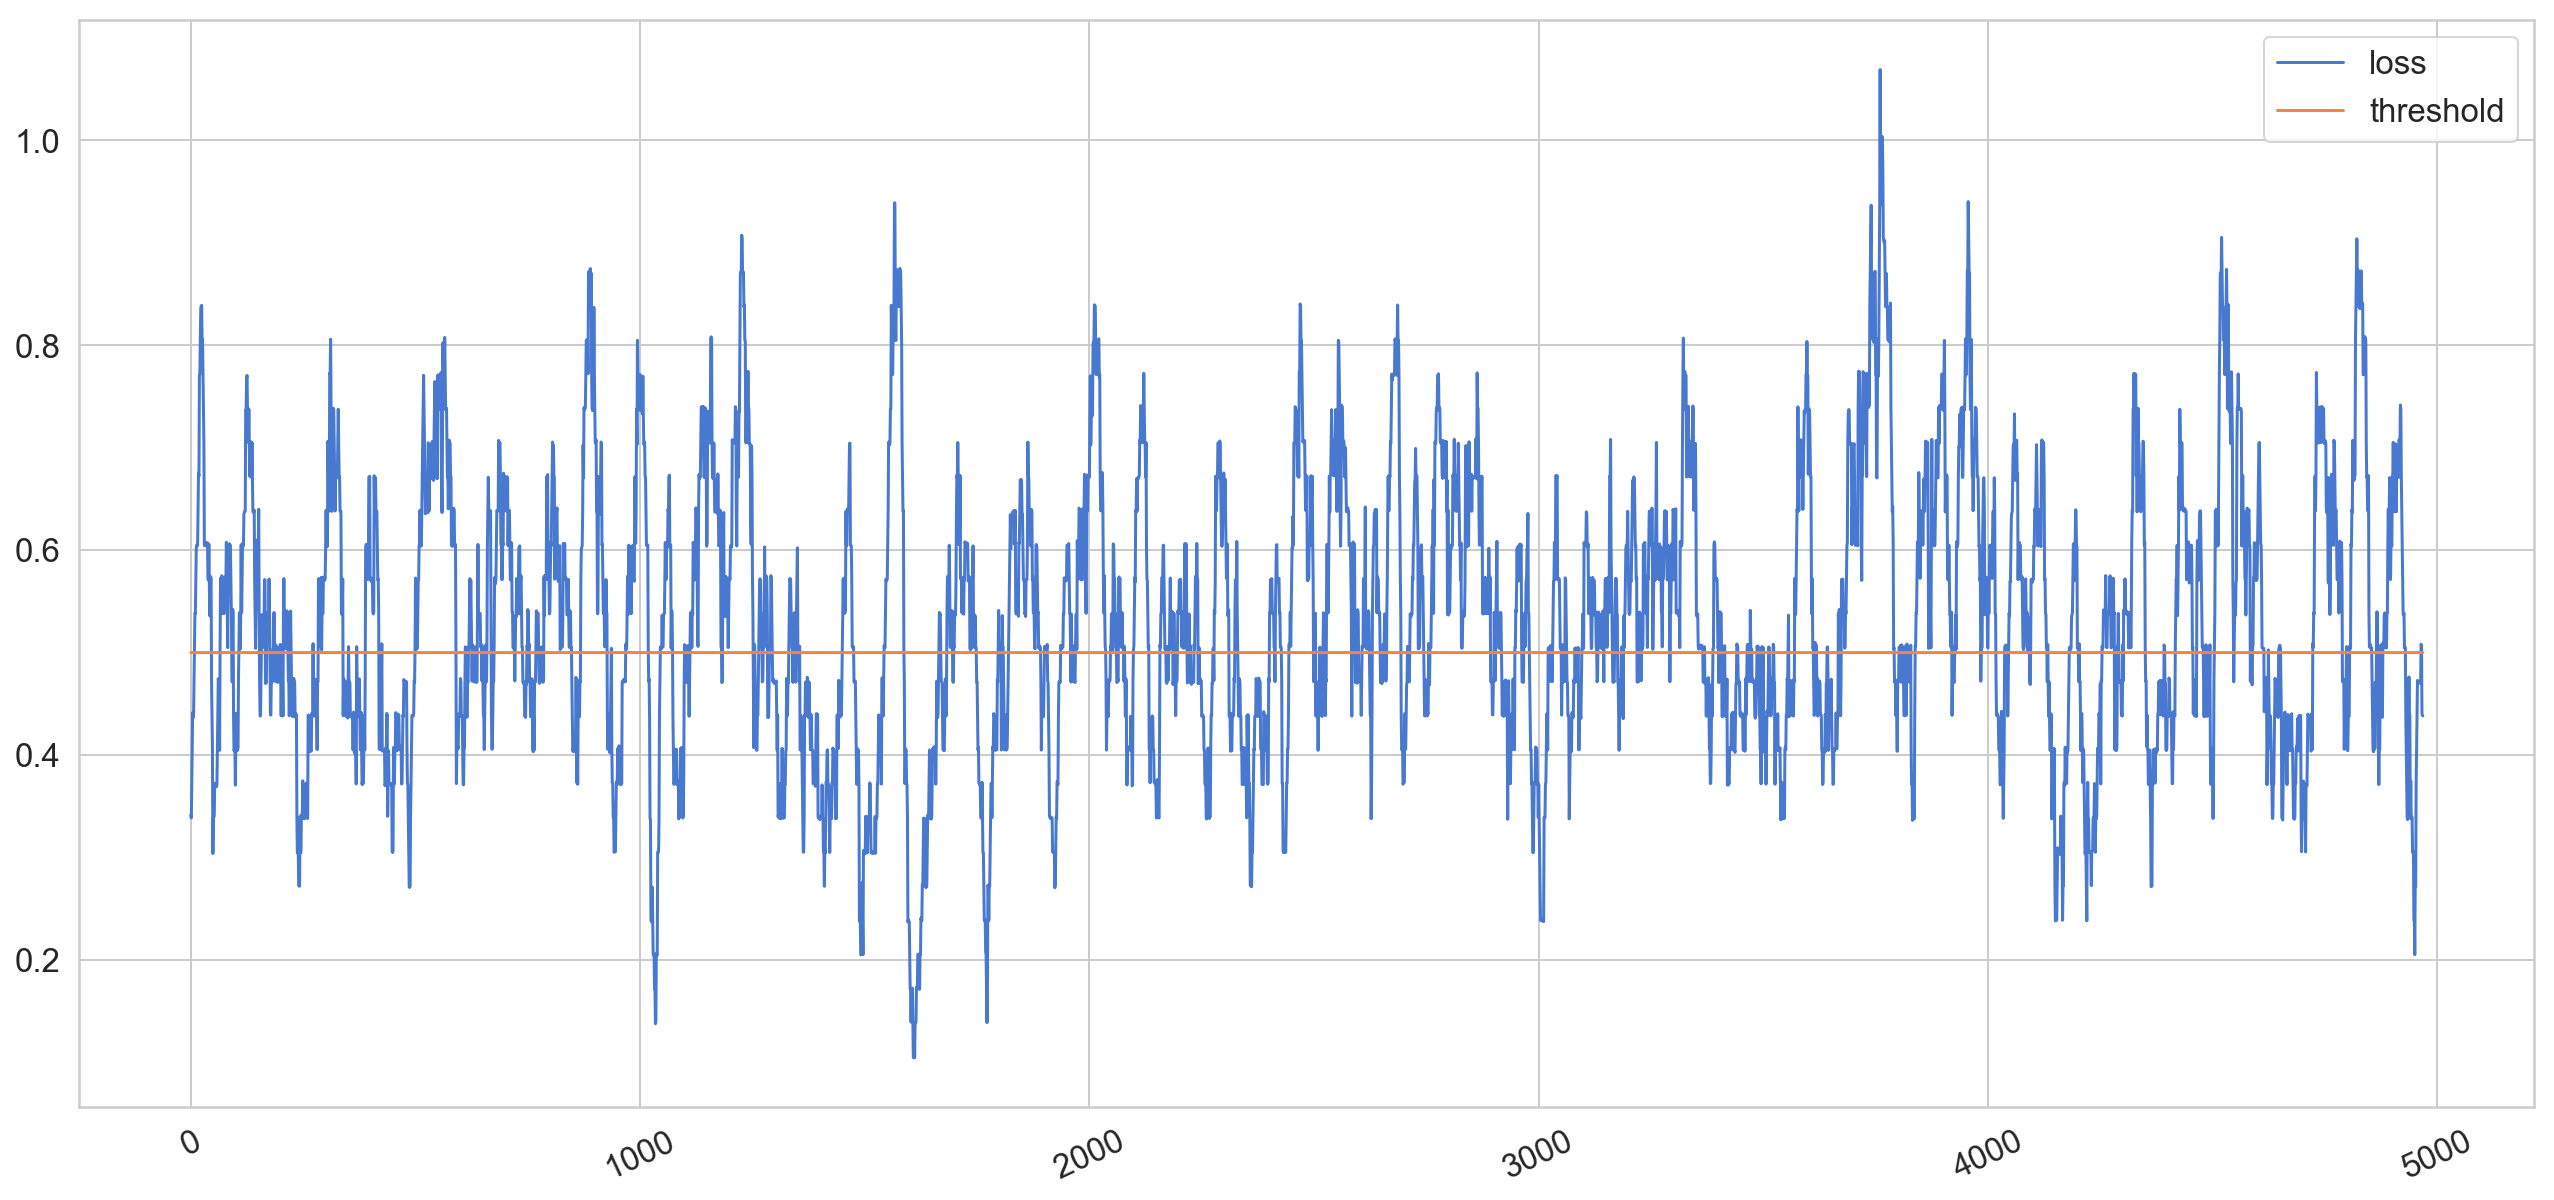

In [509]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [510]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,loss,threshold,anomaly,target
8,0.504308,0.5,True,1
9,0.538669,0.5,True,2
10,0.538062,0.5,True,2
11,0.571470,0.5,True,1
12,0.602055,0.5,True,1


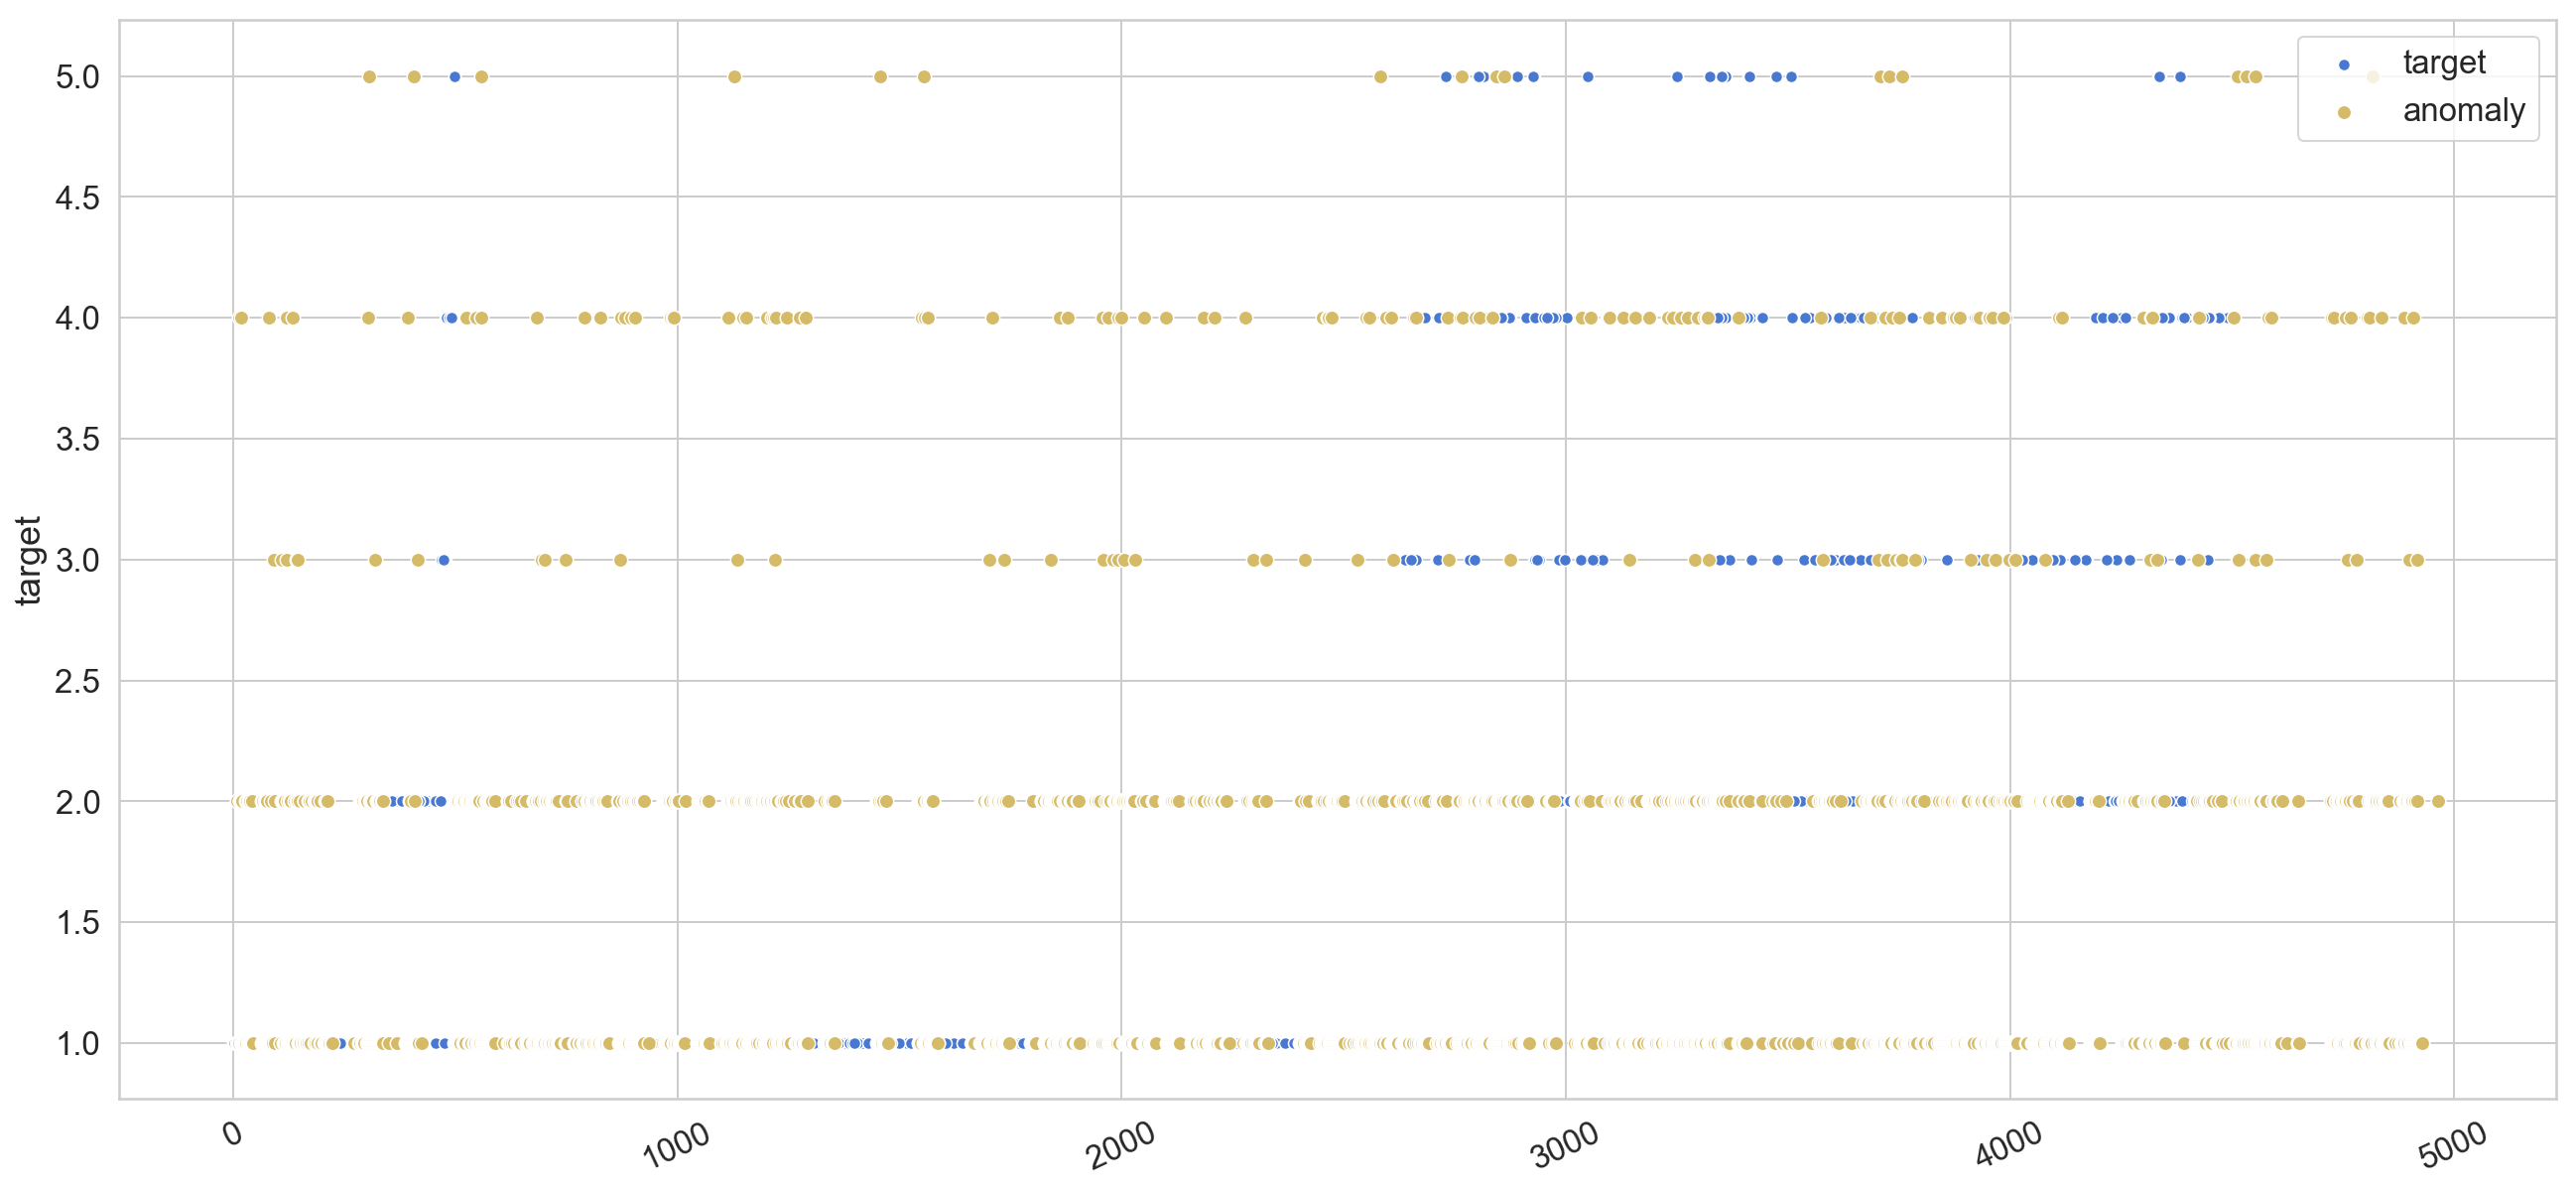

In [511]:
sns.scatterplot(
  df[TIME_STEPS:].index, 
  df[TIME_STEPS:].target, 
  label='target'
);

sns.scatterplot(
  anomalies.index,
  anomalies.target,
  color='y',
  s=52,
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend();